## **King County Housing Data**
  ## **Regression Analysis**

- Amber Yandow 
- Full-time 
- 3/8/19 - 1:30pm
- Brandon Lewis 
- https://amberlynnyandow.github.io/

## Obtaining the data and importing useful tools 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
%matplotlib inline

df = pd.read_csv('kc_house_data.csv')


df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Scrubbing the Data 

From the info, I can see that there are 21 descriptive columns about 21,597 houses. The columns waterfront, view and yr_renovated are missing data. Also, date and sqft_basement are string objects. I take a look at the head of the dataframe to get a clear picture of what the datatypes look like. 

In [4]:

#Grade = An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design. 

df.isna().any() #General inquiry to see if the 'missing values' are null



id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [5]:
df.isna().sum() #Checking to see how many null values there are 

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

I want to check the percentage of null values in each of the 3 columns. If the percentages are high I should consider dropping the columns entirely. If the percentages are under 50% I will consider removing the rows, binning the columns or replacing the null values with each columns median. 

In [6]:
wf_np = round((df['waterfront'].isna().sum() / len(df['waterfront']))* 100) 
vw_np = round((df['view'].isna().sum() / len(df['view'])) * 100) 
yr_np = round((df['yr_renovated'].isna().sum() / len(df['yr_renovated'])) * 100)

print(" Waterfront null = {} \n " "View null = {} \n "  "Yr_renovated null = {}".format(wf_np, vw_np, yr_np))


 Waterfront null = 11.0 
 View null = 0.0 
 Yr_renovated null = 18.0


The null values are negligable and I do not want to eliminate rows. I get the unique values of each of the columns and realize that the values for waterfront and view seem to be placeholders. I could use these columns as categorical variables but for now I want substitute the nulls for either the median value or zeros. The unique values for yr_renovated are as expected, the year the house was renovated. The amount of homes in the dataset that were renvoted is small so I will fill in the nulls with zeros. Getting rid of the Nans is priority one at the moment and I will look into whether filling in with zeros creates a seperate issue later on.

In [7]:
df.waterfront.unique() 

array([nan,  0.,  1.])

In [8]:
df.view.unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [9]:
df.yr_renovated.unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [10]:
waterfront_mean = round(df.waterfront.mean())
waterfront_median = df.waterfront.median()
print("waterfront_mean = {}".format(waterfront_mean))
print("waterfront_median = {}".format(waterfront_median))



view_mean = df.view.mean()
view_median = df.view.median()
print("view_mean = {}".format(view_mean))
print("view_median = {}".format(view_median))

waterfront_mean = 0.0
waterfront_median = 0.0
view_mean = 0.23386272870808952
view_median = 0.0


In [11]:
df['waterfront'] = df['waterfront'].fillna(df['waterfront'].median()) #Filling all three columns with zeros 

df['view'] = df['view'].fillna(df['view'].median())  

df['yr_renovated'] = df['yr_renovated'].fillna(0.0)

In [12]:
df.isna().sum() #Checking to make sure I got rid of the Nans

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [13]:
df.sqft_basement.value_counts() #I can't turn this column into a float so I'm looking at my value types to see if
                                #there are any strings. The sqft indicates that this column should be a float 

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
300.0       142
900.0       142
200.0       105
750.0       104
530.0       103
480.0       103
450.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
1100.0       78
670.0        78
780.0        76
550.0        76
650.0        75
240.0        74
680.0        73
380.0        73
850.0        72
          ...  
1913.0        1
2130.0        1
2810.0        1
248.0         1
768.0         1
862.0         1
4820.0        1
506.0         1
946.0         1
915.0         1
861.0         1
2610.0        1
508.0         1
602.0         1
415.0         1
1284.0        1
666.0         1
20.0          1
2240.0        1
207.0         1
652.0         1
417.0         1
374.0         1
1816.0        1
2050.0        1
2730.0        1
2720.0        1
518.0         1
935.0         1
1920.0        1
Name: sqft_basement, Len

In [14]:
df = df[df.sqft_basement != '?'] #Oh! There are 454 ?'s. So I will get rid of those. 

In [15]:
df.sqft_basement.value_counts() #Making sure I got rid of the ?'s

0.0       12826
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
900.0       142
300.0       142
200.0       105
750.0       104
530.0       103
480.0       103
450.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
1100.0       78
670.0        78
550.0        76
780.0        76
650.0        75
240.0        74
680.0        73
380.0        73
850.0        72
360.0        72
          ...  
2050.0        1
1816.0        1
602.0         1
20.0          1
415.0         1
2400.0        1
4820.0        1
2196.0        1
243.0         1
3500.0        1
1024.0        1
1525.0        1
4130.0        1
2810.0        1
1880.0        1
2500.0        1
2130.0        1
248.0         1
588.0         1
784.0         1
2120.0        1
2850.0        1
295.0         1
225.0         1
1275.0        1
1248.0        1
143.0         1
862.0         1
2190.0        1
1920.0        1
Name: sqft_basement, Len

In [16]:
df['sqft_basement'] = df.sqft_basement.astype(float) # I convert sqft_basement to a float and also decide to convert
df['waterfront'] = df.waterfront.astype('str')       # waterfront and view to strings. I suspect they will be 
df['view'] = df.view.astype('str')                   # categorical variables. 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 21 columns):
id               21143 non-null int64
date             21143 non-null object
price            21143 non-null float64
bedrooms         21143 non-null int64
bathrooms        21143 non-null float64
sqft_living      21143 non-null int64
sqft_lot         21143 non-null int64
floors           21143 non-null float64
waterfront       21143 non-null object
view             21143 non-null object
condition        21143 non-null int64
grade            21143 non-null int64
sqft_above       21143 non-null int64
sqft_basement    21143 non-null float64
yr_built         21143 non-null int64
yr_renovated     21143 non-null float64
zipcode          21143 non-null int64
lat              21143 non-null float64
long             21143 non-null float64
sqft_living15    21143 non-null int64
sqft_lot15       21143 non-null int64
dtypes: float64(7), int64(11), object(3)
memory usage: 3.5+ MB


In [17]:
df['date'] = pd.to_datetime(df['date']) # Oops! I should probably convert the date column to a date time object
df['date'].sort_values(ascending=True)

21271   2014-05-02
12484   2014-05-02
15113   2014-05-02
21145   2014-05-02
14075   2014-05-02
6705    2014-05-02
10235   2014-05-02
5038    2014-05-02
3320    2014-05-02
1040    2014-05-02
16866   2014-05-02
6418    2014-05-02
12354   2014-05-02
11895   2014-05-02
5950    2014-05-02
20543   2014-05-02
17024   2014-05-02
6305    2014-05-02
8883    2014-05-02
20133   2014-05-02
5652    2014-05-02
20586   2014-05-02
3719    2014-05-02
19051   2014-05-02
14803   2014-05-02
19661   2014-05-02
18675   2014-05-02
7954    2014-05-02
16302   2014-05-02
16909   2014-05-02
           ...    
9638    2015-05-13
6005    2015-05-13
6435    2015-05-13
16982   2015-05-13
7343    2015-05-13
1521    2015-05-13
8616    2015-05-13
12875   2015-05-13
14778   2015-05-13
17487   2015-05-13
18841   2015-05-13
4272    2015-05-13
3065    2015-05-13
817     2015-05-13
19500   2015-05-13
11899   2015-05-13
17383   2015-05-14
21434   2015-05-14
19381   2015-05-14
11548   2015-05-14
6191    2015-05-14
15797   2015

## Exploring the Data 
Once the data has been scubbed, its now in a format that I can use to start creating visuals. 

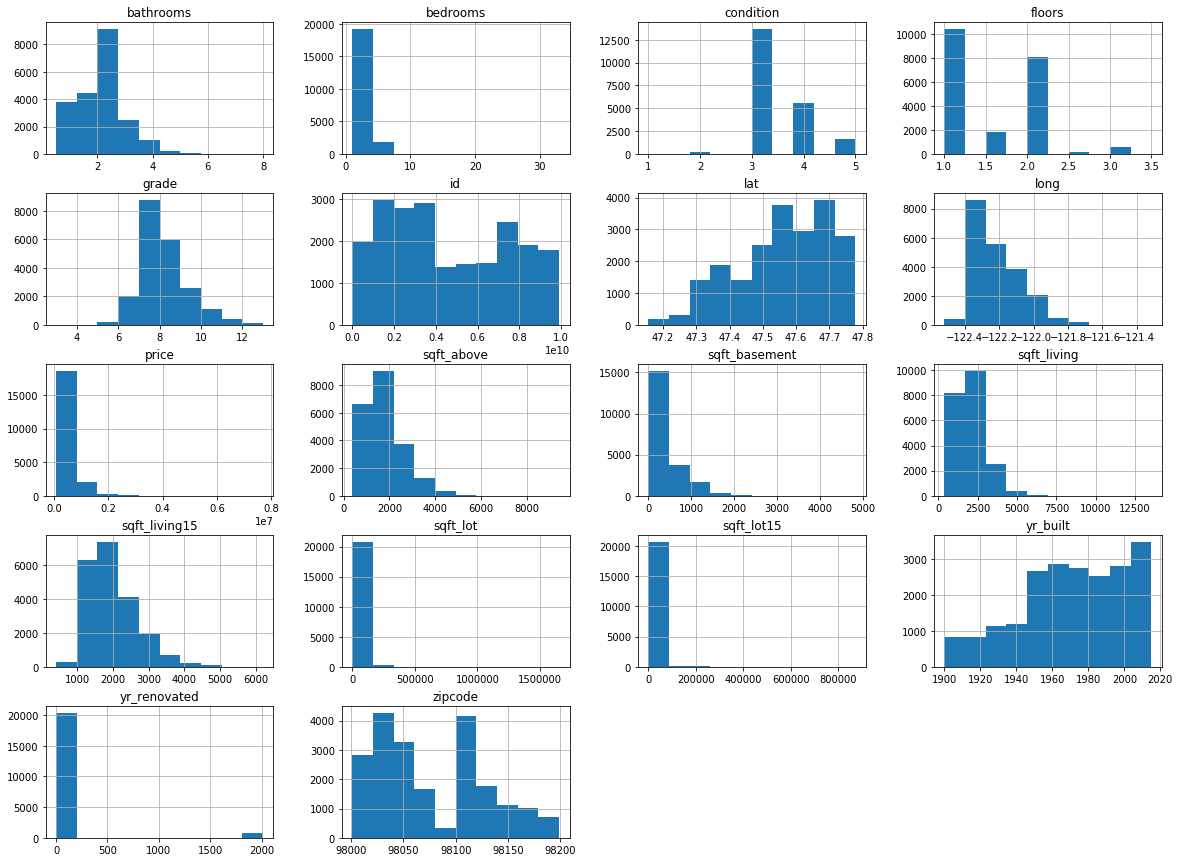

In [18]:
df.hist(figsize=(20,15)); #Looking at histograms of all the data
                          #Most of the data is skewed. 
                          #Condition, floors, bedrooms, sqft_lot, sqft_lot15 and yr_renovated might be categorical

Text(0.5, 1.0, 'Homes Sold from May2014 to May2015')

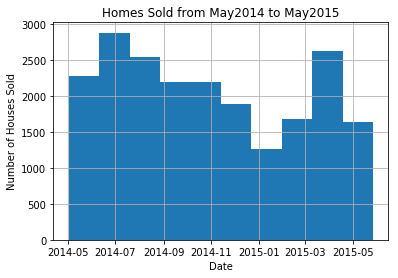

In [19]:
df.date.hist()       #Looking at the time of year when houses were sold could impact when a client 
plt.xlabel('Date')   #puts their house on the market
plt.ylabel('Number of Houses Sold')
plt.title('Homes Sold from May2014 to May2015')

In [20]:
data_pred = df.iloc[:,3:21] #data_pred is just the columns without price to show colinearity 

#pd.plotting.scatter_matrix(data_pred, figsize = [8, 8]); #Shows us multicolinerity 
#data_pred.corr()

In [21]:
abs(df.corr()) > 0.75 #The trues show a strong colinearity 

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,True,False,False,False,True,True,False,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False
sqft_above,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False


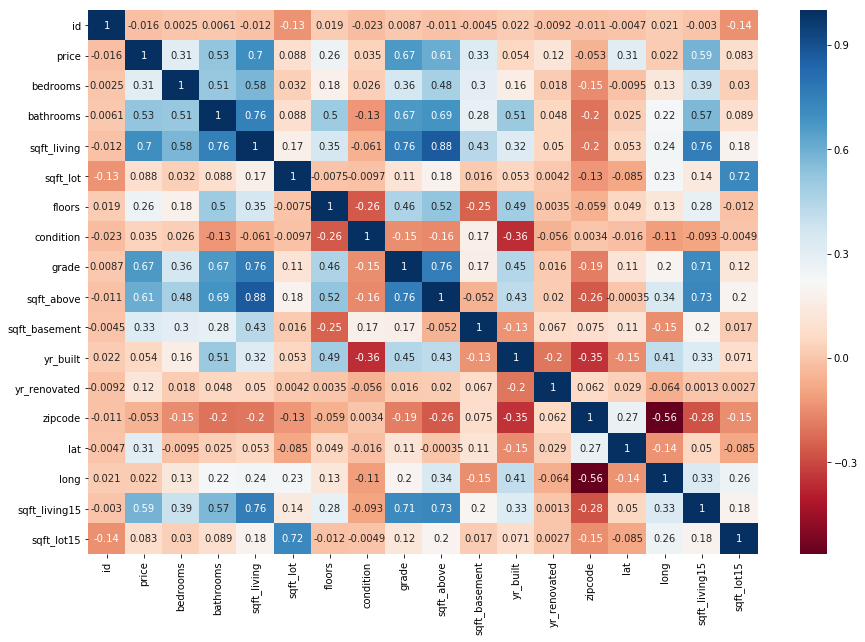

In [22]:
ax, fig = plt.subplots(figsize = (15, 10))
sns.heatmap(df.corr(), annot=True, cmap='RdBu')
plt.show() #Looks like bathrooms, sqft_living, grade, sqft_above, and sqft_living15
           #all have positive relationships to target variable 

In [23]:
np.round(df.describe()) #rounded all the datas statistics 

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.114300e+04,21143.0,21143.0,21143.0,21143.0,21143.0,21143.0,21143.0,21143.0,21143.0,21143.0,21143.0,21143.0,21143.0,21143.0,21143.0,21143.0,21143.0
mean,4.581004e+09,540511.0,3.0,2.0,2081.0,15087.0,1.0,3.0,8.0,1789.0,292.0,1971.0,68.0,98078.0,48.0,-122.0,1987.0,12739.0
std,2.876328e+09,368075.0,1.0,1.0,919.0,41209.0,1.0,1.0,1.0,828.0,442.0,29.0,363.0,54.0,0.0,0.0,686.0,27169.0
min,1.000102e+06,78000.0,1.0,0.0,370.0,520.0,1.0,1.0,3.0,370.0,0.0,1900.0,0.0,98001.0,47.0,-123.0,399.0,651.0
25%,2.123049e+09,322000.0,3.0,2.0,1430.0,5043.0,1.0,3.0,7.0,1200.0,0.0,1952.0,0.0,98033.0,47.0,-122.0,1490.0,5100.0
50%,3.904940e+09,450000.0,3.0,2.0,1910.0,7620.0,2.0,3.0,7.0,1560.0,0.0,1975.0,0.0,98065.0,48.0,-122.0,1840.0,7626.0
75%,7.309100e+09,645000.0,4.0,2.0,2550.0,10696.0,2.0,4.0,8.0,2210.0,560.0,1997.0,0.0,98117.0,48.0,-122.0,2360.0,10087.0
max,9.900000e+09,7700000.0,33.0,8.0,13540.0,1651359.0,4.0,5.0,13.0,9410.0,4820.0,2015.0,2015.0,98199.0,48.0,-121.0,6210.0,871200.0


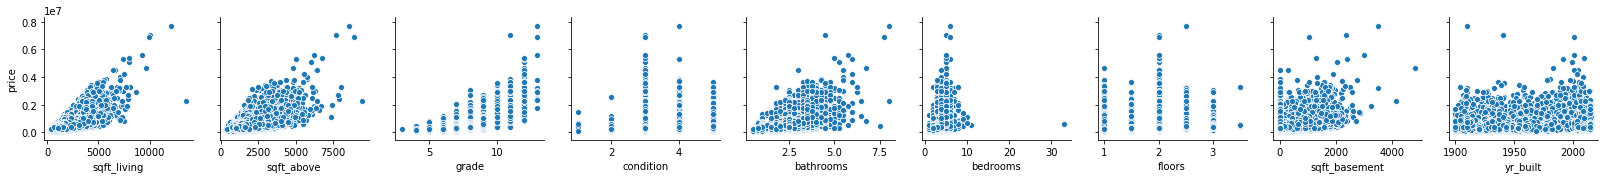

In [24]:
sns.pairplot(data=df, x_vars=[
    'sqft_living', 'sqft_above', 'grade', 'condition', 'bathrooms', 'bedrooms', 
    'floors', 'sqft_basement', 'yr_built'], y_vars=['price'])


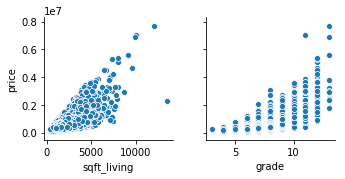

In [27]:
sns.pairplot(data=df, x_vars=['sqft_living', 'grade'], y_vars=['price']) #Intuitively, these two columns seem to be 
                                                                         #the strongest predictors 

Text(0.5, 1.0, 'Home Prices for KC Zipcodes')

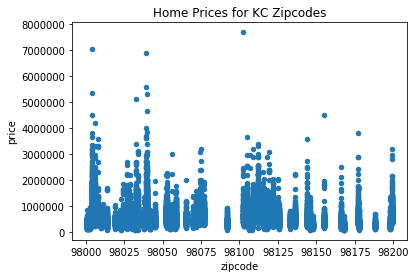

In [29]:
df.plot('zipcode', 'price', kind='scatter')
plt.title('Home Prices for KC Zipcodes')

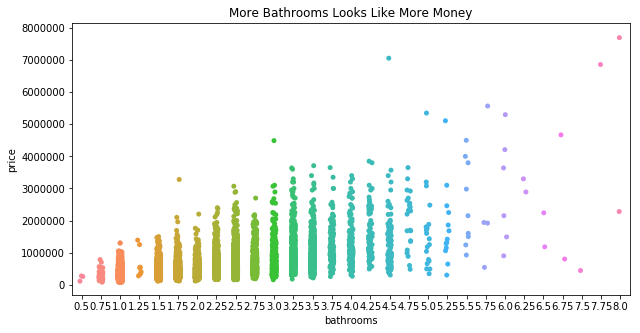

In [37]:
fig, ax = plt.subplots(figsize=(10,5))
sns.stripplot(x='bathrooms',
              y='price',
              data=df)
plt.title('More Bathrooms Looks Like More Money')
plt.show()

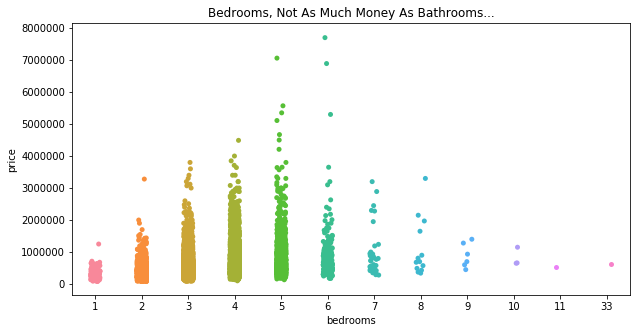

In [39]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.stripplot(x='bedrooms',
              y='price',
              data=df)
plt.title('Bedrooms, Not As Much Money As Bathrooms...')
plt.show()

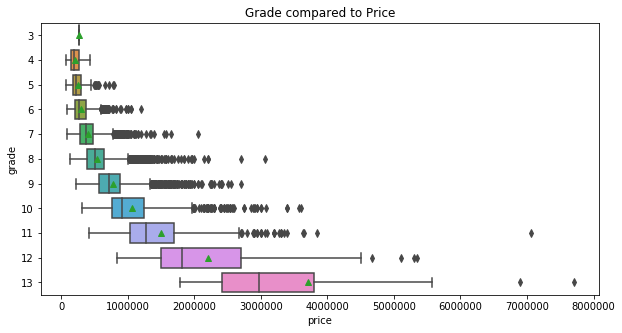

In [40]:
fig, ax = plt.subplots( figsize=(10, 5)) #This is the predictor I would focus on in a real life scenario 
sns.boxplot(y= 'grade',
           x= 'price',
           data= df,
           width= 0.8,
           orient= 'h',
           showmeans= True,
           ax = ax)
plt.title('Grade compared to Price')
plt.show()


/Users/amberyandow/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


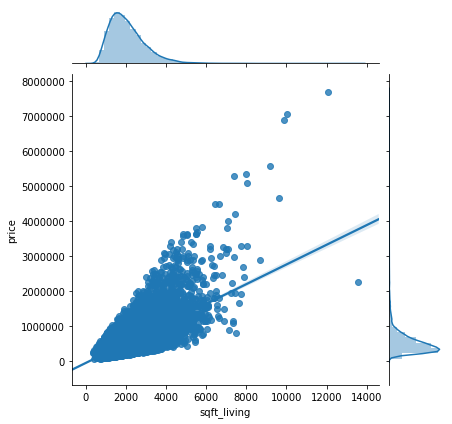

In [41]:
sns.jointplot(x='sqft_living', y='price', data=df, kind='reg')

In [ ]:
sns.jointplot(x='grade', y='price', data=df, kind='reg')

## Modeling 
After looking at some visuals it appears, intuitively, that sqft_living and grade are the best predictors for housing price in King county. However, the heatmap showed that sqft_living is highly correlated with multiple other categories which means keeping this column will likely cause the correlated variables to have large standards errors. They will appear to be statistically insignificant but in truth, they may not be.

I've decided to cast multiple variables as strings and use them as categorical data. Most of them are intuitively categorical except for zipcode and sqft_basement. There are many zeros(houses without basements) in the sqft_basement category perhaps I shoud bin this one. I have also decided to drop many variables due to multicolinearity or due to low colinearity with the target variable, Price. 

In [42]:
#changing variable types and creating seperate dataframes 
df['sqft_basement'] = df.sqft_basement.astype(float) 
df['waterfront'] = df.waterfront.astype('str') 
df['view'] = df.view.astype('str') 
df['bedrooms'] = df.bedrooms.astype('str')
df['bathrooms'] = df.bathrooms.astype('str')
df['floors'] = df.floors.astype('str')
df['grade'] = df.grade.astype('str')
df['zipcode'] = df.zipcode.astype('str')

cat_df = pd.DataFrame(data=df, columns= ['waterfront', 'view', 'bedrooms', 'bathrooms', 'floors', 'condition', 'grade'])
con_df = pd.DataFrame(data=df, columns= ['price', 'sqft_above', 'sqft_basement', 'sqft_living15', 'lat'])
to_drop = ['id', 'yr_built', 'yr_renovated', 'long', 'condition', 'date', 'sqft_lot', 'sqft_lot15', 'sqft_living', 'zipcode']
df.drop(to_drop, axis=1, inplace=True)



df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 11 columns):
price            21143 non-null float64
bedrooms         21143 non-null object
bathrooms        21143 non-null object
floors           21143 non-null object
waterfront       21143 non-null object
view             21143 non-null object
grade            21143 non-null object
sqft_above       21143 non-null int64
sqft_basement    21143 non-null float64
lat              21143 non-null float64
sqft_living15    21143 non-null int64
dtypes: float64(3), int64(2), object(6)
memory usage: 2.6+ MB


In [43]:
cat_df = pd.DataFrame(pd.get_dummies(cat_df)) #categorical data into dummy data 
cat_df.head()

,condition,waterfront_0.0,waterfront_1.0,view_0.0,view_1.0,view_2.0,view_3.0,view_4.0,bedrooms_1,bedrooms_10,...,grade_11,grade_12,grade_13,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9
0,3,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,3,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,5,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,3,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [44]:
from sklearn.preprocessing import StandardScaler #Transforming data 
scaler = StandardScaler()
con_df_norm = scaler.fit_transform(con_df)
con_df_scaler = pd.DataFrame(con_df_norm, columns = ['price','sqft_above', 'sqft_basement', 'sqft_living15', 'lat'])

con_df_scaler.head()


/Users/amberyandow/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/amberyandow/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,price,sqft_above,sqft_basement,sqft_living15,lat
0,-0.865634,-0.735244,-0.659570,-0.944020,-0.354103
1,-0.006821,0.459845,0.244410,-0.433559,1.159735
2,-0.979472,-1.230180,-0.659570,1.068656,1.281679
3,0.172494,-0.892175,1.396984,-0.914851,-0.284833
4,-0.082895,-0.131664,-0.659570,-0.273128,0.407867


In [47]:
df = pd.concat([con_df_scaler, cat_df], axis=1)


df.to_csv("housing_data_cleaned.csv", index=False)

df = pd.read_csv('housing_data_cleaned.csv')
df.head()

,price,sqft_above,sqft_basement,sqft_living15,lat,condition,waterfront_0.0,waterfront_1.0,view_0.0,view_1.0,...,grade_11,grade_12,grade_13,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9
0,-0.865634,-0.735244,-0.659570,-0.944020,-0.354103,3.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.006821,0.459845,0.244410,-0.433559,1.159735,3.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.979472,-1.230180,-0.659570,1.068656,1.281679,3.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.172494,-0.892175,1.396984,-0.914851,-0.284833,5.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.082895,-0.131664,-0.659570,-0.273128,0.407867,3.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [48]:
df.iloc[:,0:15].info() #Oops! They are all floats again 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21586 entries, 0 to 21585
Data columns (total 15 columns):
price             21143 non-null float64
sqft_above        21143 non-null float64
sqft_basement     21143 non-null float64
sqft_living15     21143 non-null float64
lat               21143 non-null float64
condition         21143 non-null float64
waterfront_0.0    21143 non-null float64
waterfront_1.0    21143 non-null float64
view_0.0          21143 non-null float64
view_1.0          21143 non-null float64
view_2.0          21143 non-null float64
view_3.0          21143 non-null float64
view_4.0          21143 non-null float64
bedrooms_1        21143 non-null float64
bedrooms_10       21143 non-null float64
dtypes: float64(15)
memory usage: 2.5 MB


In [50]:
for cat_names in df.iloc[:,5:].columns: #Lets change them back 
    df[cat_names] = df[cat_names].astype('category')
    
    
df.iloc[:,0:15].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21586 entries, 0 to 21585
Data columns (total 15 columns):
price             21143 non-null float64
sqft_above        21143 non-null float64
sqft_basement     21143 non-null float64
sqft_living15     21143 non-null float64
lat               21143 non-null float64
condition         21143 non-null category
waterfront_0.0    21143 non-null category
waterfront_1.0    21143 non-null category
view_0.0          21143 non-null category
view_1.0          21143 non-null category
view_2.0          21143 non-null category
view_3.0          21143 non-null category
view_4.0          21143 non-null category
bedrooms_1        21143 non-null category
bedrooms_10       21143 non-null category
dtypes: category(10), float64(5)
memory usage: 1.0 MB


In [51]:
import statsmodels.formula.api as smf   #Modeling the continuous data 

col_names = df.describe().columns.drop(['price'])
results = [['ind_var', 'r-squared', 'intercept', 'slope', 'p-value']]
for idx, val in enumerate(col_names):
    print("KC_Housing: price~" + val)
    print("*********************")
    
    f = 'price~' + val
    model = smf.ols(formula=f, data=df).fit()
    X_new = pd.DataFrame({val: [df[val].min(), df[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])


KC_Housing: price~sqft_above
*********************
['sqft_above', 0.36619760286513126, -9.367506770274758e-17, 0.605142630183275, 0.0]
KC_Housing: price~sqft_basement
*********************
['sqft_basement', 0.10562995560962252, -9.367506770274758e-17, 0.3250076239253795, 0.0]
KC_Housing: price~sqft_living15
*********************
['sqft_living15', 0.3438828169564687, -9.367506770274758e-17, 0.5864152257201962, 0.0]
KC_Housing: price~lat
*********************
['lat', 0.09394655450758804, -1.7199783264310042e-14, 0.30650702195477963, 0.0]


In [52]:
pd.DataFrame(results)

,0,1,2,3,4
0,ind_var,r-squared,intercept,slope,p-value
1,sqft_above,0.366198,-9.36751e-17,0.605143,0
2,sqft_basement,0.10563,-9.36751e-17,0.325008,0
3,sqft_living15,0.343883,-9.36751e-17,0.586415,0
4,lat,0.0939466,-1.71998e-14,0.306507,0


### Analyzing 
A low p-value suggests that the null hypothesis is unlikely to be true. 
The r-squared values measure the goodness of fit of our model. Our values are pretty low which suggests our model could be better. The slope for sqft_above is the greatest indicating it has the highest positive correlation with
our target variable.

In [53]:
#cols_condition = df.columns[5:6]     ###Tried to model categorical data but could not figure out###
#cols_waterfront = df.columns[6:7]
#cols_view = df.columns[8:12]
#cols_bedrooms = df.columns[13:24]
#cols_bathrooms = df.columns[25:53]
#cols_floors = df.columns[54:59]
#cols_grade = df.columns[60:70]


#cols = [cols_condition, cols_waterfront, cols_view, cols_bedrooms, cols_bathrooms, cols_floors, cols_grade]
#for col in cols:
    #sum_cols = "+".join(col)
    #form = "price~" + sum_cols
    #model = smf.ols(formula= form, data= df).fit()
    #print(model.summary())


In [54]:
X = con_df.drop(['price'], axis=1) #When I drop price from the X I get reasonable r-squares but my p-values change to 0
y = pd.DataFrame(con_df, columns=['price'])

import statsmodels.api as sm
X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     7079.
Date:                Fri, 08 Mar 2019   Prob (F-statistic):               0.00
Time:                        09:53:12   Log-Likelihood:            -2.9198e+05
No. Observations:               21143   AIC:                         5.840e+05
Df Residuals:                   21138   BIC:                         5.840e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.386e+07   5.72e+05    -59.228      0.000    -3.5e+07   -3.27e+07
sqft_above      234.5495      3.069     76.424      0.000     228.534     240.565
sqft_basement   247.3924      4.018     61.570      0.000     239.517     255.268
sqft_living15    68.2181      3.782     18.038      0.000      60.805      75.631
lat            7.101e+05    1.2e+04     59.052      0.000    6.87e+05    7.34e+05
==============================================================================
Omnibus:                    17666.408   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1190881.579
Skew:                           3.609   Prob(JB):                         0.00
Kurtosis:                      39.051   Cond. No.                     9.90e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
y = con_df[['price']]      #Train test splitting 
X = con_df.drop(['price'], axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(len(X_train), len(X_test), len(y_train), len(y_test))



16914 4229 16914 4229


In [56]:
from sklearn.linear_model import LinearRegression #Validation with RMSE
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test = np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squared Error:', mse_train)
print('Test Mean Squared Error:', mse_test)

Train Mean Squared Error: price    5.750472e+10
dtype: float64
Test Mean Squared Error: price    5.955012e+10
dtype: float64


In [57]:
from sklearn.metrics import mean_squared_error #K-vold validation 
from sklearn.model_selection import cross_val_score

cv_10_results = cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error')

cv_10_results

array([-6.43219780e+10, -6.89613644e+10, -5.07632080e+10, -6.74956153e+10,
       -5.37554544e+10, -5.12838039e+10, -5.04938493e+10, -5.54242607e+10,
       -5.78619886e+10, -6.13625594e+10])

## Analysis 
Why do we need to test train? The reason we build the model is so we can better predict housing prices when we introduce new data. There are many economic factors, for example, that can influence housing prices that are not included in our data set. We use test-train-split to test the predictive ability of the model. So when we do introduce that new data we can trust in our models accuracy. There is not a significant difference between our ys and our y hats. This implies that our model is decent. There are only 2 significant coefficients in this model, sqft_basement and sqft_above. I presume sqft_living would have been significant as well but I dropped it because of its strong multicollinearity with multiple predictors. I believe grade would have been a strong predictor also if I could've got my categorical variables to work in statsmodels. 

Some of this data looks promising. Other areas need tweaking. Instead of running an intial test model I dropped variables that were multicollinear and standardized the data. If I had more time I would have run a simple model, analyzed the results and then I would have standardized. I also did not find time to create a regression plot after the model creation. Not to mention the categorcial variables that I was unable to get into a model. There are avenues I would have explored in greater detail after reviewing the presentation.  